In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys, glob, re, math

# import pip
# pip.main(['install', "pyros_setup"])

sys.path.append('/home/wal/catkin_ws/devel/lib/python2.7/dist-packages')

import pyros_setup
try:
    import rospy, rosbag
    import rosgraph
    import rosnode
except ImportError:  # if ROS environment is not setup, we emulate it.
    pyros_setup.configurable_import().configure('mysetup.cfg').activate()  # this will use mysetup.cfg from pyros-setup instance folder
    import rospy, rosbag
    import rosgraph
    import rosnode

import scipy
import scipy.stats
from scipy.stats import pearsonr

from smap.msg import smapStats

from IPython.display import HTML, display

from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib import cm
from numpy import linspace
from matplotlib.colors import LogNorm
from decimal import *

Ignoring replanning_tunnel/lcb_0.000000.bag.
replanning_tunnel/lcb_0.000000_1.bag 143
37.2
Total time: 2.11666666667
15
replanning_tunnel/lcb_0.000000_2.bag 165
45.3666666667
Total time: 2.6
8
replanning_tunnel/lcb_0.000000_3.bag 124
39.15
Total time: 1.96666666667
5
replanning_tunnel/lcb_0.000000_5.bag 158
44.3666666667
Total time: 2.48333333333
8
Ignoring replanning_tunnel/lcb_0.250000.bag.
replanning_tunnel/lcb_0.250000_1.bag 110
33.7666666667
Total time: 1.66666666667
9
replanning_tunnel/lcb_0.250000_2.bag 171
47.9
Total time: 2.71666666667
7
replanning_tunnel/lcb_0.250000_3.bag 132
39.0
Total time: 2.08333333333
6
replanning_tunnel/lcb_0.250000_4.bag 105
35.05
Total time: 1.66666666667
4
replanning_tunnel/lcb_0.250000_5.bag 100
33.85
Total time: 1.58333333333
4
Ignoring replanning_tunnel/lcb_0.500000.bag.
replanning_tunnel/lcb_0.500000_1.bag 126
38.8
Total time: 2.0
5
replanning_tunnel/lcb_0.500000_2.bag 83
30.85
Total time: 1.31666666667
3
replanning_tunnel/lcb_0.500000_3.bag 136

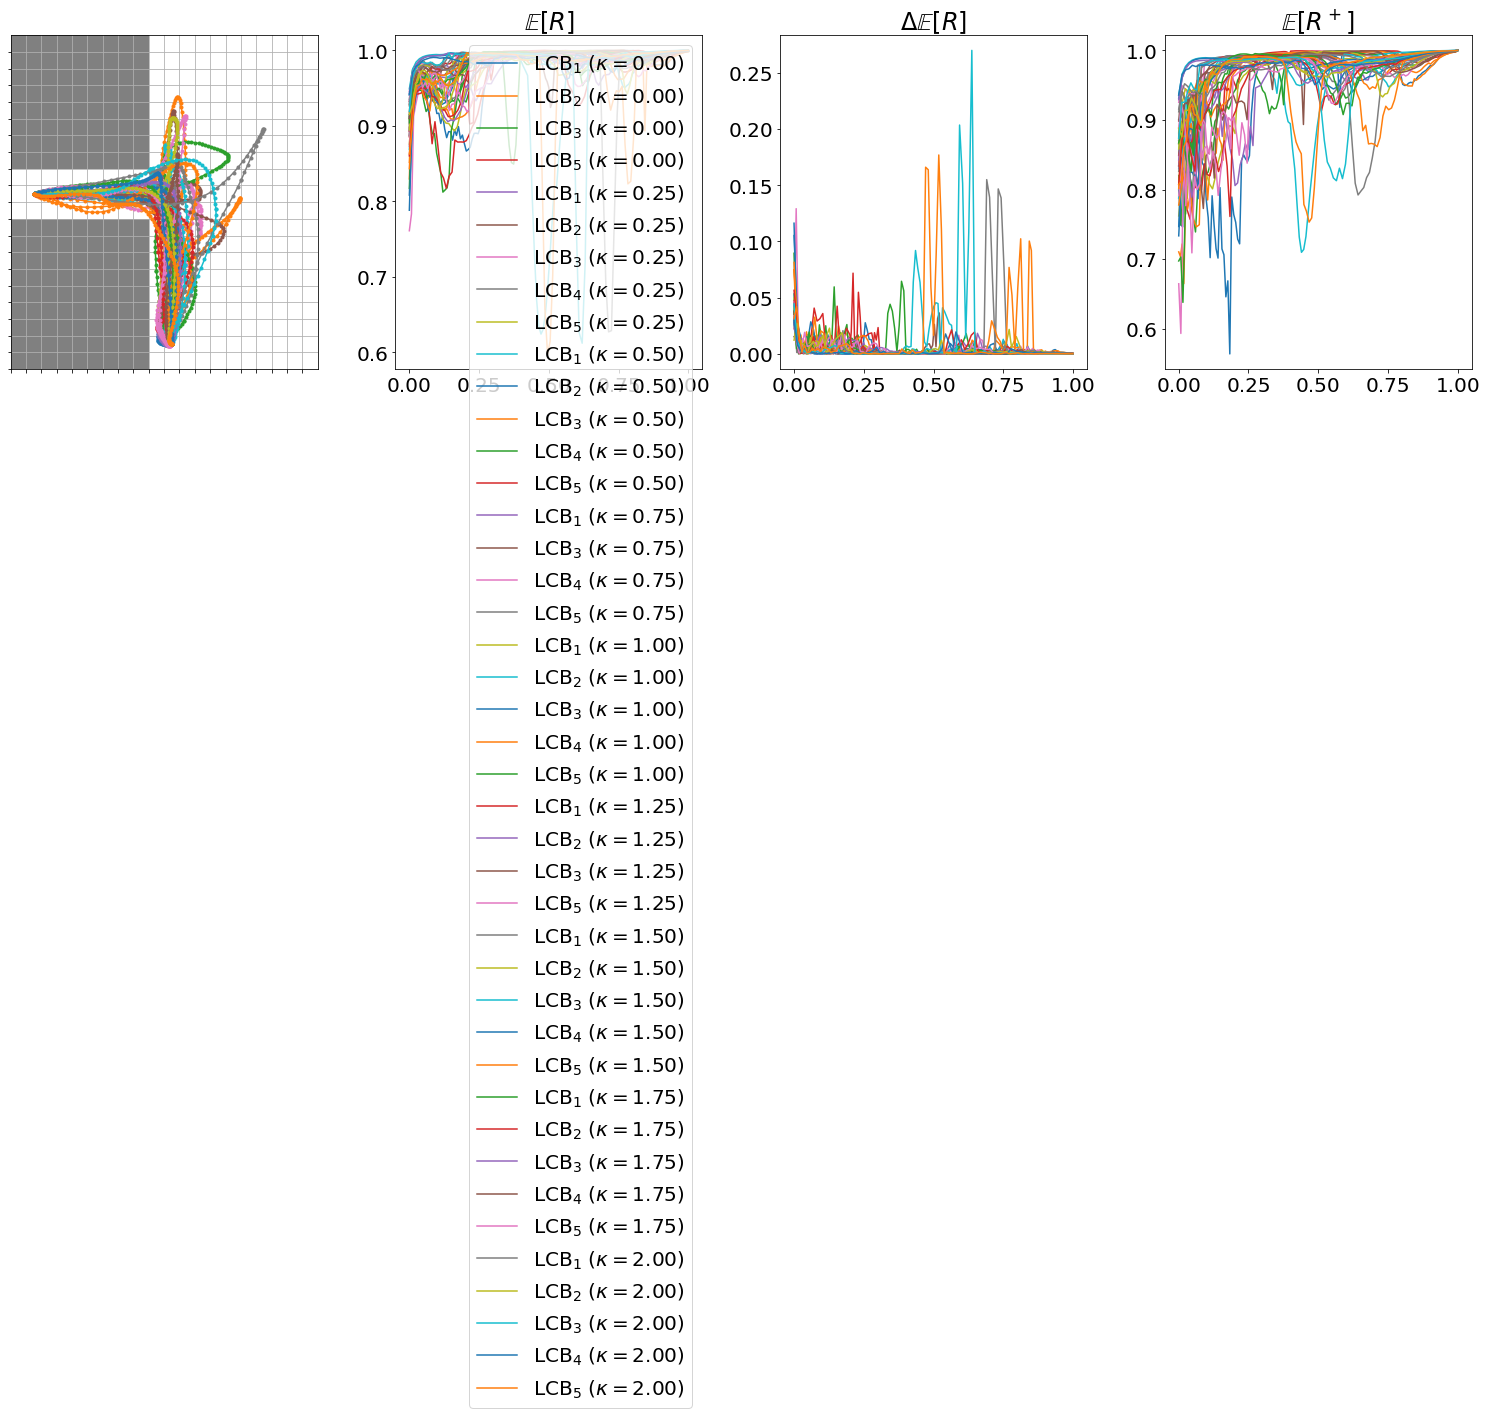

In [106]:
%matplotlib inline

getcontext().prec = 1024

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

fig, ((ax1, ax2, ax4, ax5)) = plt.subplots(1,4, figsize=(21, 6))
# fig.suptitle("Replanning evaluation")

verts1 = [
    (-1, -1), # left, bottom
    (-1, -.1), # left, top
    (-.1, -.1), # right, top
    (-.1, -1), # right, bottom
    (0., 0.), # ignored
]

verts2 = [
    (-1, .2), # left, bottom
    (-1, 1), # left, top
    (-.1, 1), # right, top
    (-.1, .2), # right, bottom
    (0., 0.), # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

ax1.add_patch(patches.PathPatch(Path(verts1, codes), facecolor='grey', lw=0))
ax1.add_patch(patches.PathPatch(Path(verts2, codes), facecolor='grey', lw=0))
ax1.set_xticks(np.arange(-1,1,0.1))
ax1.set_yticks(np.arange(-1,1,0.1))
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.grid()

# ax10.add_patch(patches.PathPatch(Path(verts1, codes), facecolor='grey', lw=0))
# ax10.add_patch(patches.PathPatch(Path(verts2, codes), facecolor='grey', lw=0))
# ax10.set_xticks(np.arange(-1,1,0.1))
# ax10.set_yticks(np.arange(-1,1,0.1))
# ax10.set_xlim([-1, 1])
# ax10.set_ylim([-1, 1])
# ax10.grid()

filenames = sorted(glob.glob("replanning_tunnel/*.bag"))


cm_subsection = linspace(0, 1, len(filenames))
# colors = [cm.jet(x) for x in cm_subsection]

def plot_spline(ax, stats, name, rnd, random_color=False):
    args = tuple(re.findall("lcb_([0-9.]{4}).*?_([0-9]+)", name))
    if len(args) == 0:
        print "Ignoring %s." % name
        return None
    k, r = args[0]
    r = int(r)
    name = "LCB$_%i$ ($\kappa=%s$)" % (r,k)
    if random_color:
        ax.plot(stats.trajectoryX, stats.trajectoryY, '.-', label=name)
    else:
        ax.plot(stats.trajectoryX, stats.trajectoryY, '.-', label=name)
    return name
        
for rnd, filename in enumerate(filenames):
    #if rnd != 7:
     #   continue
#     if rnd != 50:
#         continue
    
    #print "Evaluating trajectory %i (%s)..." % (rnd, filename)
    bag = rosbag.Bag(filename)
    stats = None
    for _, msg, _ in bag.read_messages(topics=['stats']):
        stats = msg
    bag.close()
    if stats is None:
        continue
        
#     start = 0
#     err0sBelief = []
#     err0sLogOdds = []
#     ax = plt.subplot(111)
#     for step in range(stats.step):
#         err0Belief = np.mean(np.array(stats.errorCompleteUpdatedBelief[start:start + stats.updatedVoxels[step]]))
#         err0sBelief.append(err0Belief)
#         err0LogOdds = np.mean(np.array(stats.errorCompleteUpdatedLogOdds[start:start + stats.updatedVoxels[step]]))
#         err0sLogOdds.append(err0LogOdds)
#         start += stats.updatedVoxels[step]
#     ax.plot(err0sBelief, label="SMAP")
#     ax.plot(err0sLogOdds, label="LogOdds")

#     if rnd == 5:
#         ax1.plot(stats.trajectoryX, stats.trajectoryY, label="T %i" % rnd, c=colors[rnd])
    name = plot_spline(ax1, stats, filename, rnd)
    if name is None:
        continue
        
    steps = np.linspace(0, 1, len(stats.planningReachabilities))
    stds = stats.planningStds if hasattr(stats, "planningStds") else stats.planningVariances
    ax2.plot(steps, stats.planningReachabilities, '-', label=name)
#     steps = np.linspace(0, 1, (len(stds)))
#     ax3.plot(steps, stds, '-', c=colors[rnd])
    
    if hasattr(stats, "planningFutureReachabilities"):
        steps = np.linspace(0, 1, (len(stats.planningFutureReachabilities)))
        ax5.plot(steps, stats.planningFutureReachabilities, '-', label=name)
        print filename, len(stats.planningFutureReachabilities)
        print sum(stats.trajectoryTime)
        # compute time (sum up local maxima)
        total = stats.trajectoryTime[-1]
        for t, nt in zip(stats.trajectoryTime, stats.trajectoryTime[1:]):
            if t > nt:
                total += t
        print "Total time:", total
#     if hasattr(stats, "planningFutureStds"):
#         steps = np.linspace(0, 1, (len(stats.planningFutureStds)-1))
#         ax6.plot(steps, stats.planningFutureStds[:-1], '-', c=colors[rnd])        
        
    if hasattr(stats, "replanningIterations"):
        print stats.replanningIterations
#         ax4.scatter([rnd], [stats.replanningIterations], c=colors[rnd])
        
    steps = np.linspace(0, 1, (len(stds)-1))
    ax4.plot(steps, np.abs(np.diff(stats.planningReachabilities)), '-', label=name)
    
ax2.legend()
ax2.set_title("$\mathbb{E}[R]$")
# ax3.set_title("$\sigma[R]$")
ax4.set_title("Number of Replanning Iterations")
ax5.set_title("$\mathbb{E}[R^+]$")
# ax6.set_title("$\sigma[R^+]$")
ax4.set_title("$\Delta\mathbb{E}[R]$")
plt.tight_layout()
plt.savefig("replanning_curve.png")

Ignoring replanning_tunnel/lcb_0.000000.bag.
Ignoring replanning_tunnel/lcb_0.250000.bag.
Ignoring replanning_tunnel/lcb_0.500000.bag.
Ignoring replanning_tunnel/lcb_0.750000.bag.
Ignoring replanning_tunnel/lcb_1.000000.bag.
Ignoring replanning_tunnel/lcb_1.250000.bag.
Ignoring replanning_tunnel/lcb_1.500000.bag.
Ignoring replanning_tunnel/lcb_1.750000.bag.
Ignoring replanning_tunnel/lcb_2.000000.bag.
Improvement in iterations DescribeResult(nobs=8, minmax=(0.33333333333333331, 0.73333333333333328), mean=0.56874999999999998, variance=0.017689043209876538, skewness=-0.44470388280398715, kurtosis=-0.8096718805444989)
Improvement in time DescribeResult(nobs=8, minmax=(0.15199999999999977, 0.34545454545454529), mean=0.27845454545454529, variance=0.0049072868949232634, skewness=-0.8564545015565292, kurtosis=-0.7815570859389482)


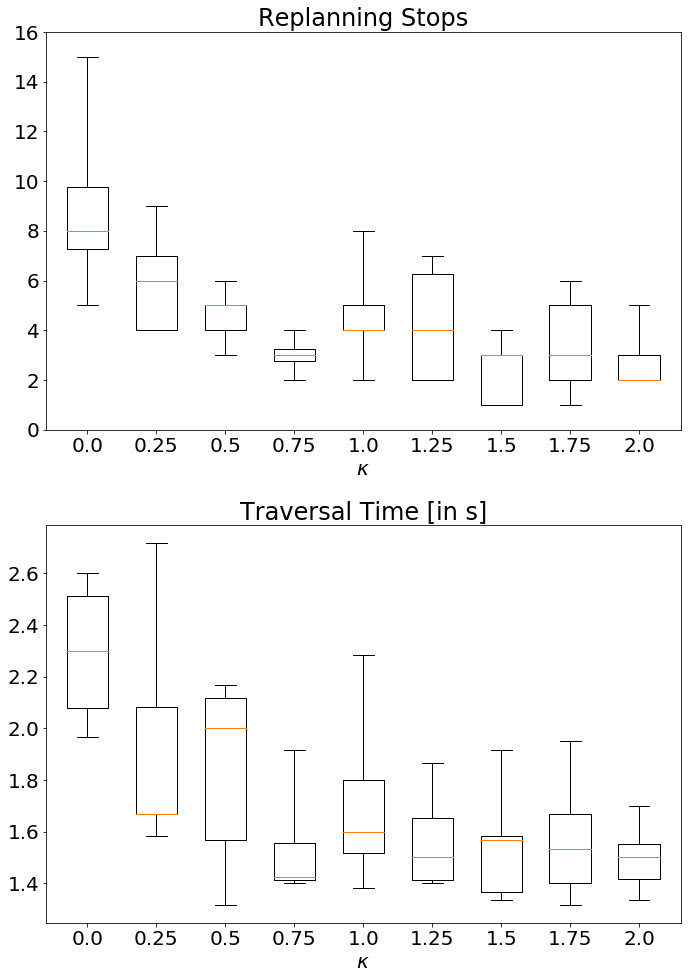

In [105]:
%matplotlib inline

getcontext().prec = 1024

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 14))
filenames = sorted(glob.glob("replanning_tunnel/*.bag"))


cm_subsection = linspace(0, 1, len(filenames))
# colors = [cm.jet(x) for x in cm_subsection]

import collections
from matplotlib.ticker import MaxNLocator

def plot_spline(ax, stats, name, rnd, random_color=False):
    args = tuple(re.findall("lcb_([0-9.]{4}).*?_([0-9]+)", name))
    if len(args) == 0:
        print "Ignoring %s." % name
        return None
    k, r = args[0]
    r = int(r)
    name = "LCB$_%i$ ($\kappa=%s$)" % (r,k)
    return name

iterations = collections.defaultdict(list)
times = collections.defaultdict(list)
        
for rnd, filename in enumerate(filenames):
    #print "Evaluating trajectory %i (%s)..." % (rnd, filename)
    bag = rosbag.Bag(filename)
    stats = None
    for _, msg, _ in bag.read_messages(topics=['stats']):
        stats = msg
    bag.close()
    if stats is None:
        continue
        
    name = plot_spline(ax1, stats, filename, rnd)
    if name is None:
        continue
        
    args = tuple(re.findall("lcb_([0-9.]{4}).*?_([0-9]+)", filename))
    k, r = args[0]
    r = int(r)
    k = float(k)
    
    iterations[k].append(stats.replanningIterations)
#     ax1.scatter([k], [stats.replanningIterations])

    if hasattr(stats, "planningFutureReachabilities"):
        steps = np.linspace(0, 1, (len(stats.planningFutureReachabilities)))
#         print filename, len(stats.planningFutureReachabilities)
#         print sum(stats.trajectoryTime)
        # compute time (sum up local maxima)
        total = stats.trajectoryTime[-1]
        for t, nt in zip(stats.trajectoryTime, stats.trajectoryTime[1:]):
            if t > nt:
                total += t
#         print "Total time:", total
        # ax2.scatter([k], [total])
        times[k].append(total)     
        
    
ax1.set_title("Replanning Stops")
ax2.set_title("Traversal Time [in s]")

import scipy
import itertools

kappas = sorted(iterations.keys())
lcb_iterations = [np.mean(i) for k,i in iterations.items() if k > 0]
# lcb_iterations = np.array(list(itertools.chain(*lcb_iterations)))
# print lcb_iterations
print "Improvement in iterations", scipy.stats.describe(np.divide(np.mean(iterations[0])-lcb_iterations, np.mean(iterations[0])))
iterations = [iterations[k] for k in kappas]
lcb_times = [np.mean(i) for k,i in times.items() if k > 0]
# lcb_iterations = np.array(list(itertools.chain(*lcb_iterations)))
# print lcb_iterations
print "Improvement in time", scipy.stats.describe(np.divide(np.mean(times[0])-lcb_times, np.mean(times[0])))
times = [times[k] for k in kappas]
ax1.boxplot(iterations, whis=5, positions=kappas, widths = 0.15)
ax1.set_xlim([min(kappas)-.15, max(kappas)+.15])
ax1.set_xlabel("$\kappa$")
ax1.set_ylim([0, 16])
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.boxplot(times, whis=5, positions=kappas, widths = 0.15)
ax2.set_xlim([min(kappas)-.15, max(kappas)+.15])
ax2.set_xlabel("$\kappa$")
plt.tight_layout()
plt.savefig("replanning_stops_time.png", dpi=300)

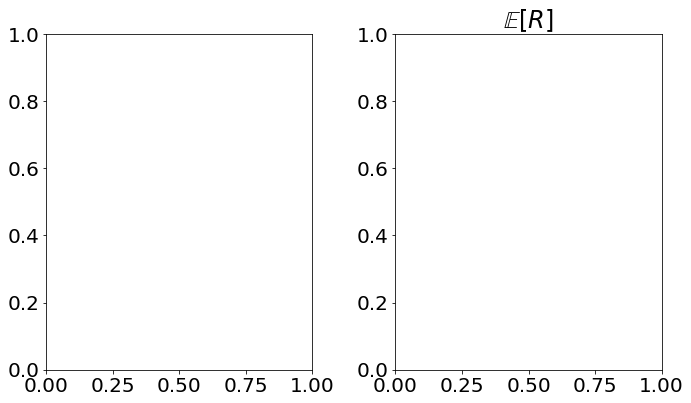

In [36]:
%matplotlib inline

getcontext().prec = 1024

matplotlib.rcParams.update({'font.size': 20})

fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(10, 6))

filenames = sorted(glob.glob("replanning_corridor/*.bag"))


cm_subsection = linspace(0, 1, len(filenames))
colors = [cm.jet(x) for x in cm_subsection]
        
for rnd, filename in enumerate(filenames):
    bag = rosbag.Bag(filename)
    stats = None
    for _, msg, _ in bag.read_messages(topics=['stats']):
        stats = msg
    bag.close()
    if stats is None:
        continue        
    
    stats.replanningIterations
        
        
    if hasattr(stats, "planningVelocities"):
        print filename, "Velocity:", np.mean(stats.planningVelocities)
        time = 0.
        for x, y, lx, ly, v in zip(stats.trajectoryX[1:], stats.trajectoryY[1:], stats.trajectoryX, stats.trajectoryY, stats.planningVelocities[1:]):
            l = np.sqrt((x-lx)**2. + (y-ly)**2.)
            time += l / v
        print filename, "Time:", time
    
ax2.set_title("$\mathbb{E}[R]$")
ax2.legend()
plt.tight_layout()
plt.savefig("replanning_corridor.png")